* Name: Tugadi, Marlv Andrei T.
* Section: CPE313 - CPE32S7

## Face Detection

In [ ]:
import cv2
import os
import numpy as np  # Import NumPy for array operations

# Load the Haar cascade for face detection
cascade_path = 'haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

# Load your dataset of face images
dataset_path = 'dataset'
face_images = []
labels = []
label_dict = {}  # Dictionary to map labels to integers
label_count = 0
for filename in os.listdir(dataset_path):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(dataset_path, filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_images.append(gray)
        label = filename.split('.')[0]  # Extract label from filename
        if label not in label_dict:
            label_dict[label] = label_count
            label_count += 1
        labels.append(label_dict[label])  # Add label index to labels

# Train the face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(face_images, np.array(labels))

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        label, confidence = recognizer.predict(roi_gray)

        if confidence < 100:  # Threshold for confidence
            text = "Tugadi"
        else:
            text = "Unknown"

        cv2.putText(frame, text, (x, y+h+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('Face Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


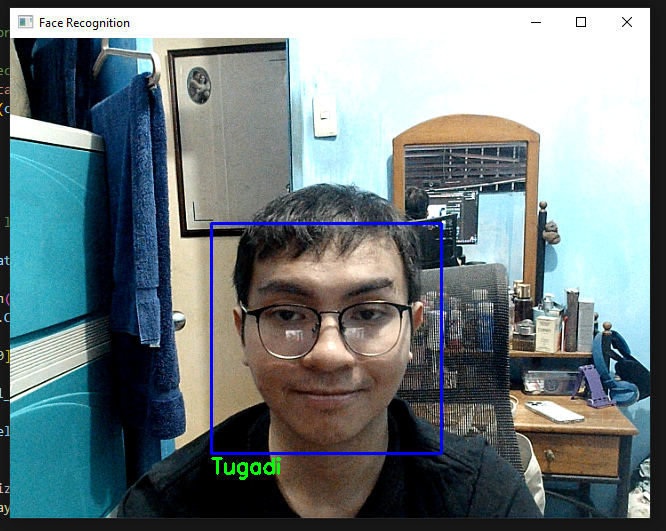

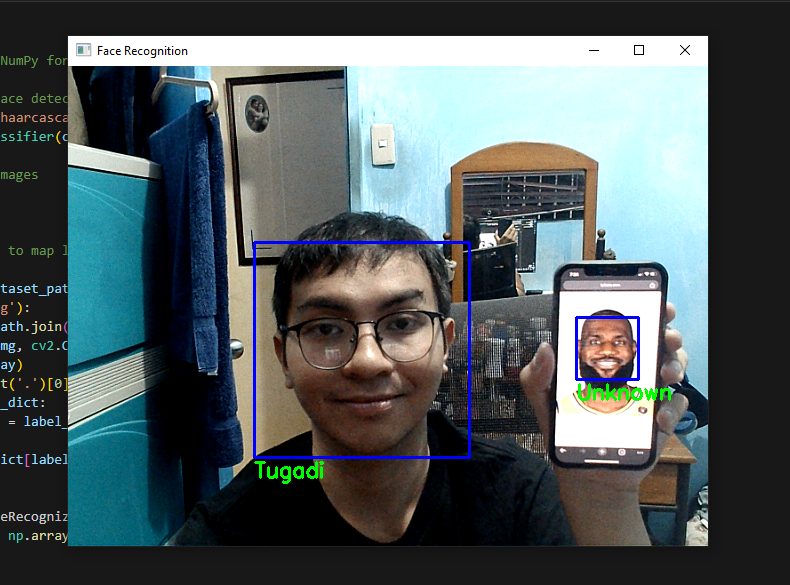



## Mood Detection

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json

# Define emotions
emotion_dict = {0: "Angry", 1: "Happy", 2: "Sad", 3: "Confused"}

# Load the emotion model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Start capturing video
cap = cv2.VideoCapture(0)

# Create a loop for real-time processing
while True:
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame
    frame = cv2.resize(frame, (1280, 720))

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Iterate through detected faces
    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray = gray_frame[y:y + h, x:x + w]

        # Preprocess the image for emotion prediction
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)

        # Predict emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))

        # Display predicted emotion
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


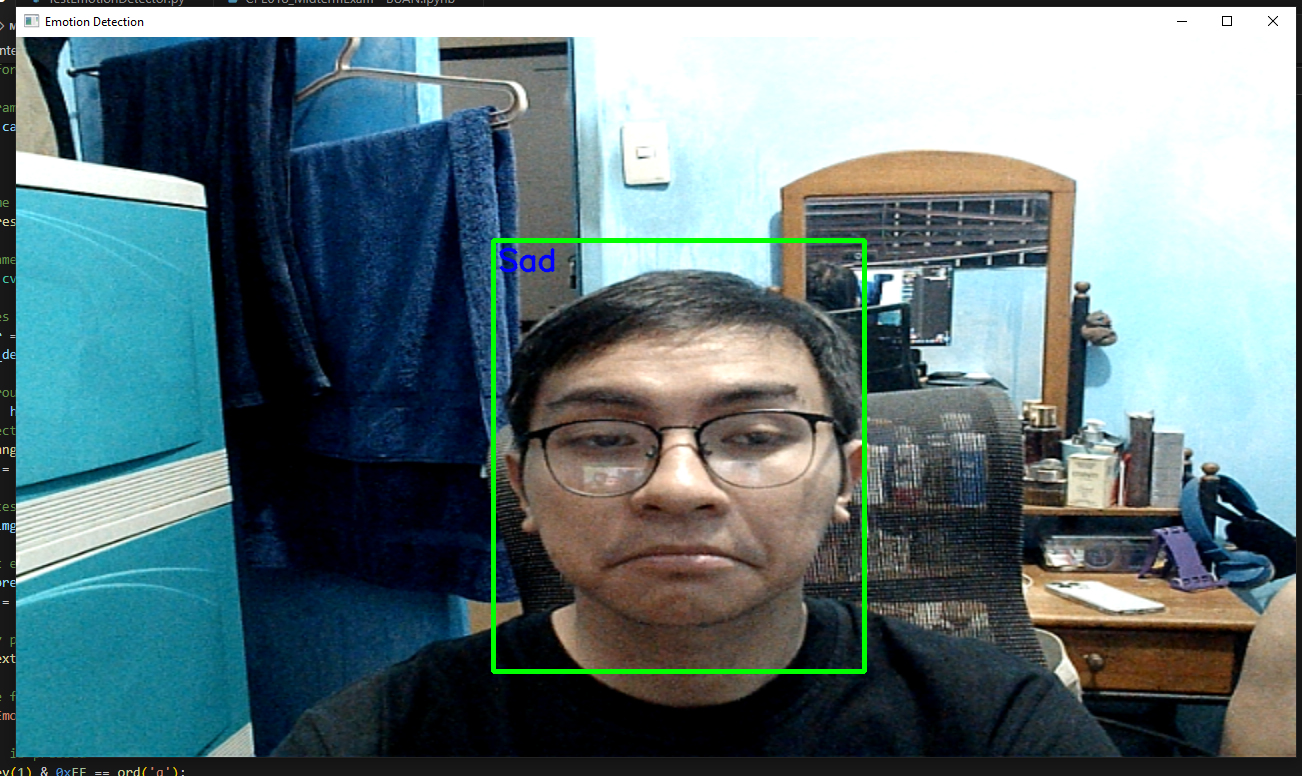

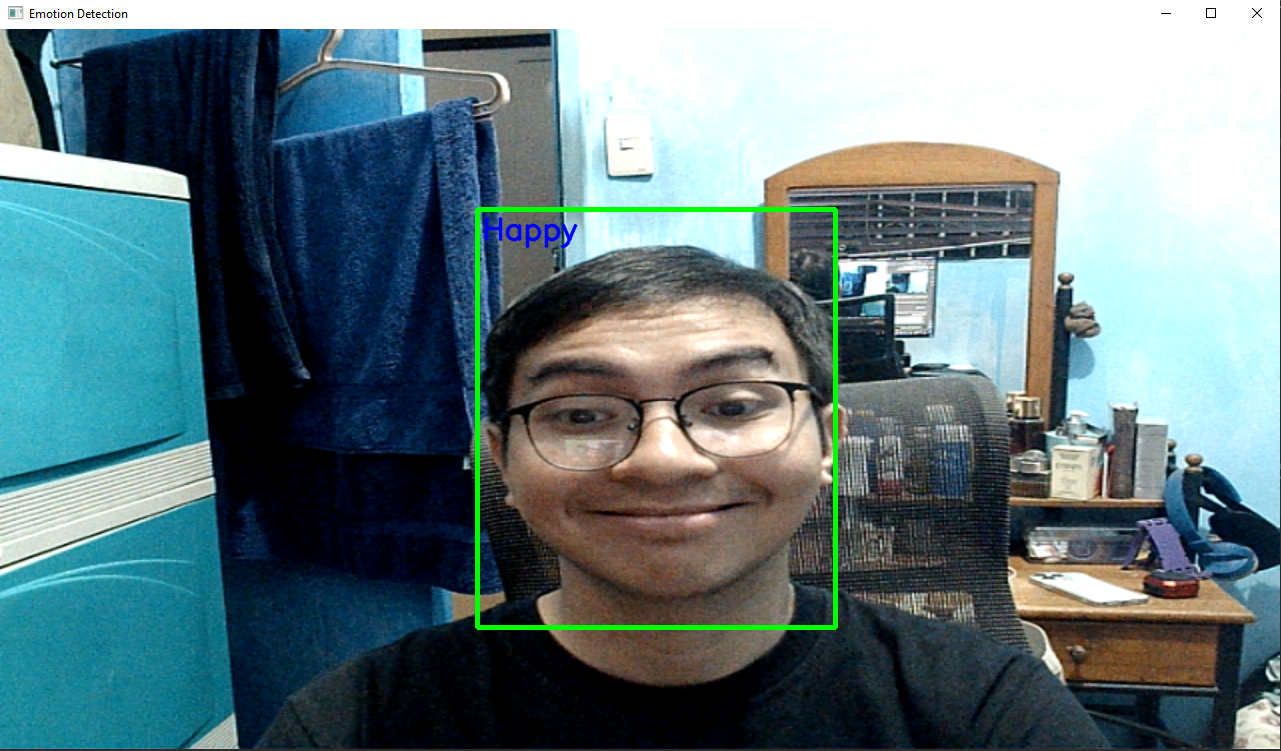

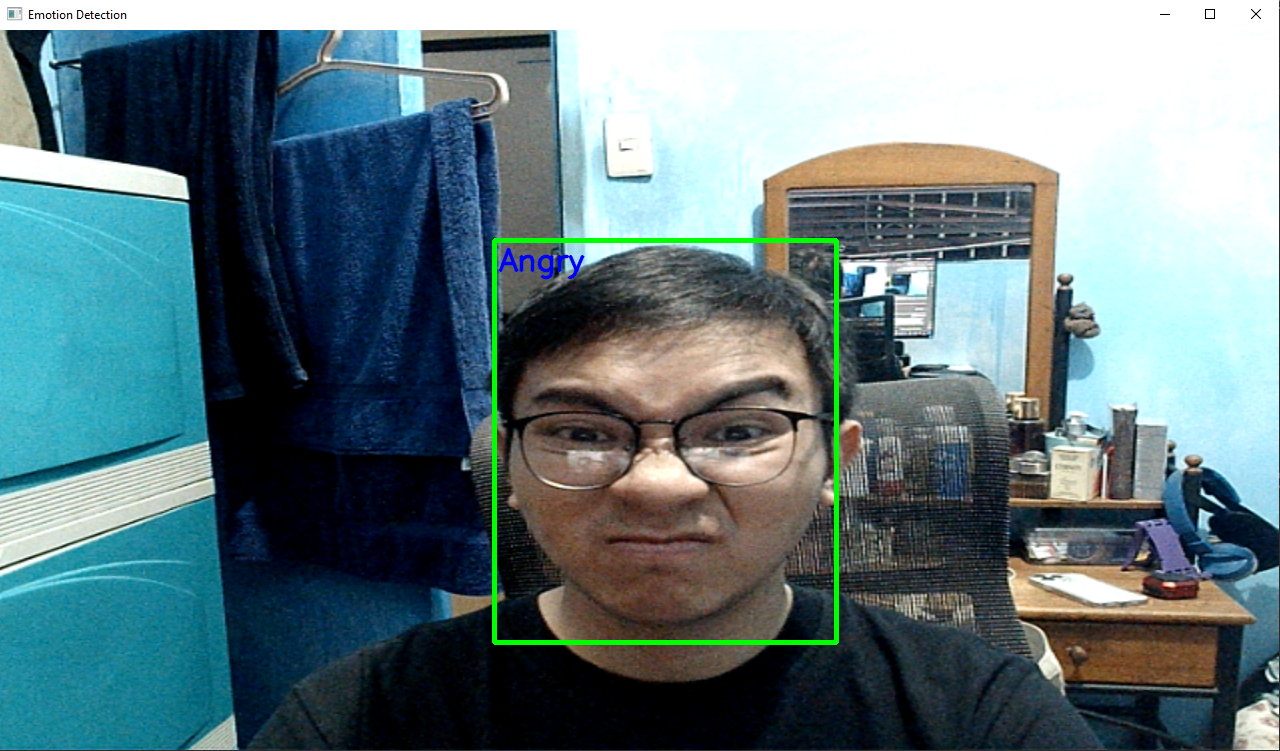

## Explanation

- In this activity, I created a face recognition code, which identify my face and displays my name, the structure of the code is composed of different implementations and techniques such as open-cv, dataset gathering, and model training. Also, using the implementation of haarcascade, I was able to fully utilize the face detection. On the other hand, the mood detection relies on detecting the mood based on the pre-trained '.h5' file model, and also by gathering the weights of the model it can determine the current mood of my face.